In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
#from jh_utils.data.pandas.preprocessing import make_dummies
from get_df import get_data_for_ml,keep_cols,small_column_names_for_mldf
from plot import lines_plot, columnX
import seaborn as sns
import statsmodels.tsa.stattools as smt

/home/joaoholz/miniconda3/envs/lestat/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
df = get_data_for_ml()
df = df[keep_cols]

/home/joaoholz/Documents/LSTAT/joao/trabalho2/get_df.py:29: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df.date_time.dt.weekofyear


In [7]:
df

A612 - temperatura maxima na hora ant. (aut) (°c)  \
0                                                   29.2   
1                                                   30.6   
2                                                   31.0   
3                                                   30.8   
4                                                   30.1   
...                                                  ...   
36823                                               25.9   
36824                                               24.8   
36825                                               23.7   
36826                                               23.1   
36827                                               23.0   

       A613 - temperatura maxima na hora ant. (aut) (°c)  \
0                                                   22.5   
1                                                   23.4   
2                                                   24.3   
3                                                   24.4   
4                                                   23.8   
...                                                  ...   
36823                                               18.1   
36824                                               16.8   
36825                                               15.8   
36826                                               15.2   
36827                                               14.4   

       A614 - temperatura maxima na hora ant. (aut) (°c)  \
0                                                   29.1   
1                                                   29.9   
2                                                   31.5   
3                                                   32.8   
4                                                   33.9   
...                                                  ...   
36823                                               24.0   
36824                                               22.9   
36825                                               22.2   
36826                                               21.6   
36827                                               21.7   

       A634 - temperatura maxima na hora ant. (aut) (°c)  hour_9  hour_9**2  \
0                                                   28.9       3          9   
1                                                   31.6       4         16   
2                                                   32.4       5         25   
3                                                   32.3       6         36   
4                                                   31.7       7         49   
...                                                  ...     ...        ...   
36823                                               26.0      10        100   
36824                                               23.8      11        121   
36825                                               23.0      12        144   
36826                                               21.8      13        169   
36827                                               20.8      14        196   

       hour_9**3  month_2  month_3  month_4  month_5  month_6  month_7  \
0             27        1        0        0        0        0        0   
1             64        1        0        0        0        0        0   
2            125        1        0        0        0        0        0   
3            216        1        0        0        0        0        0   
4            343        1        0        0        0        0        0   
...          ...      ...      ...      ...      ...      ...      ...   
36823       1000        0        0        1        0        0        0   
36824       1331        0        0        1        0        0        0   
36825       1728        0        0        1        0        0        0   
36826       2197        0        0        1        0        0        0   
36827       2744        0        0        1        0        0        0   

      

In [8]:
df.columns = small_column_names_for_mldf

In [10]:
df2 = df.iloc[:,:4]
df.iloc[:,:4]

A612  A613  A614  A634
0      29.2  22.5  29.1  28.9
1      30.6  23.4  29.9  31.6
2      31.0  24.3  31.5  32.4
3      30.8  24.4  32.8  32.3
4      30.1  23.8  33.9  31.7
...     ...   ...   ...   ...
36823  25.9  18.1  24.0  26.0
36824  24.8  16.8  22.9  23.8
36825  23.7  15.8  22.2  23.0
36826  23.1  15.2  21.6  21.8
36827  23.0  14.4  21.7  20.8

[36828 rows x 4 columns]

In [10]:
# construct array
from itertools import combinations

In [23]:
ls = list(combinations([1,2,3,4],2))

In [33]:
cross_correlation = []
for i in ls:
    cross_correlation.append(smt.ccf(df.iloc[:,i[0]].to_numpy(),df.iloc[:,i[1]].to_numpy()))    

In [32]:
ls

[(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]

In [47]:
def plot_ccf_sm(target, exog, unbiased=False, nlags=30):
    """Plot CCF using Statsmodels"""
    ccfs = smt.ccf(target, exog, adjusted=False)[:nlags+1]
    lags = np.arange(len(ccfs))[:nlags+1]
    _ = plt.stem(lags, ccfs, use_line_collection=True)
    _ = plt.title(f"Cross Correlation (Statsmodels): {target.name} & {exog.name}")
    _ = plt.show()

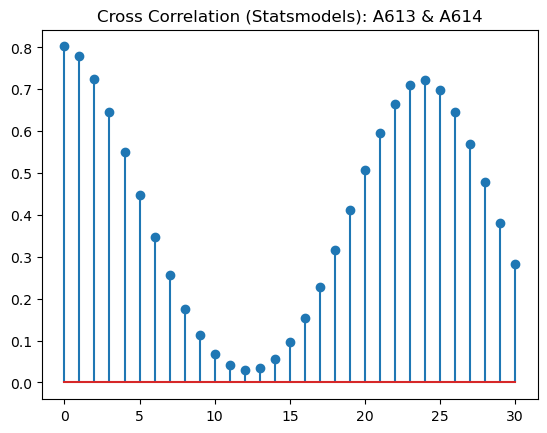

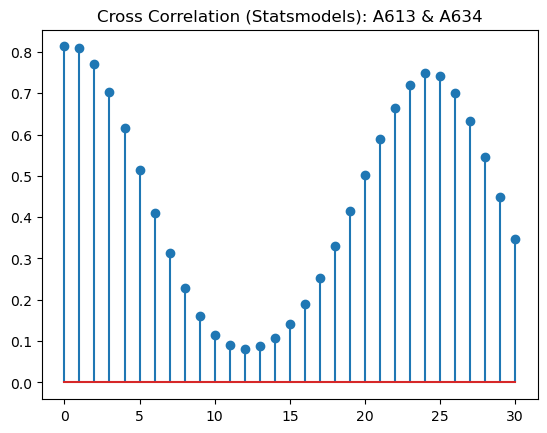

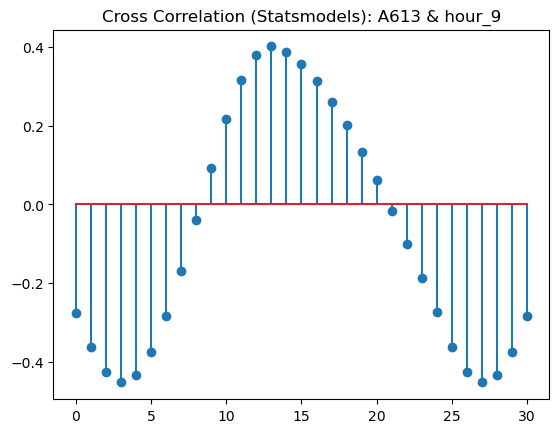

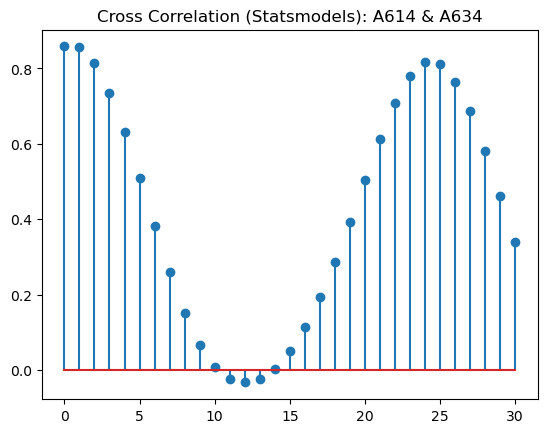

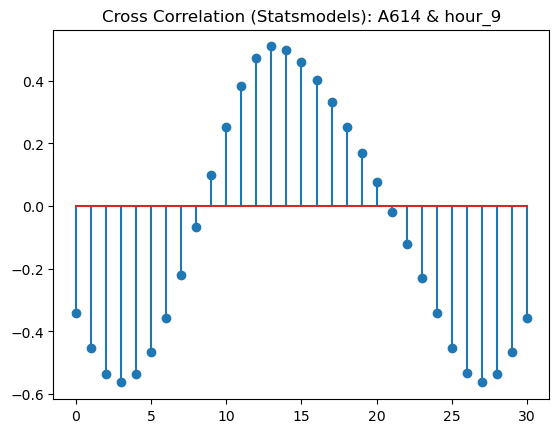

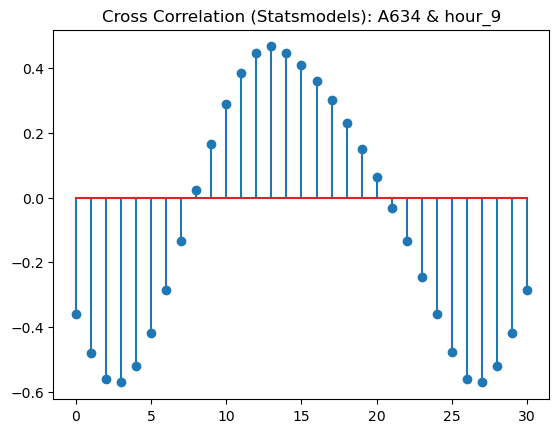

In [48]:
cross_correlation = []
for i in ls:
    plot_ccf_sm(df.iloc[:,i[0]],df.iloc[:,i[1]])  